# Basic Classification

This part demonstrates how to perform basic classification with sk-learn.

- naive bayes
- decision trees

In [1]:
# code by python 3.5
# code about native bayes
# native bayes contains 3 models: MultinomialNB,BernoulliNB and GaussianNB, we take GaussianNB as an example
import numpy
from sklearn.naive_bayes import GaussianNB

def test_gaussian_nb():
    #height,weight,size of foot
    X = numpy.array([
        [6, 180, 12],
        [5.92, 190, 11],
        [5.58, 170, 12],
        [5.92, 165, 10],
        [5, 100, 6],
        [5.5, 150, 8],
        [5.42, 130, 7],
        [5.75, 150, 9],
    ])

    #sex 1 is male and 2 is female
    Y = numpy.array([1, 1, 1, 1, 0, 0, 0, 0])

    gnb = GaussianNB()
    gnb.fit(X, Y)

    test = numpy.array([6, 130, 8]).reshape(1, -1)
    result = gnb.predict(test)
    print(result)
    print("0 is female, 1 is male")


if __name__ == '__main__':
    test_gaussian_nb()


[0]
0 is female, 1 is male


Accuracy:0.98


C:\Users\fengwang\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\fengwang\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


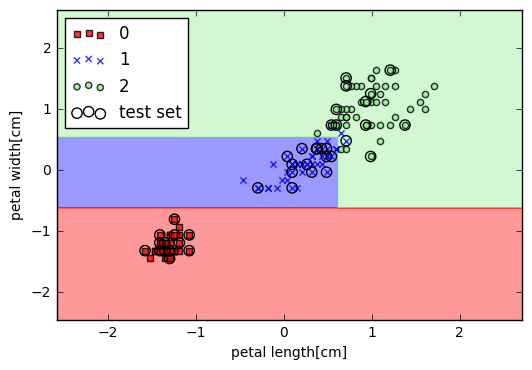

In [2]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# to draw the pic
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # set pic params
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

   
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
  
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
   
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')


# insert data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
# divide test data set and train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)  
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_std, y_train)
# forest=RandomForestClassifier(criterion='entropy',n_estimators=10,n_jobs=2,random_state=1)
# forest.fit(X_train_std,y_train)
y_pred = tree.predict(X_test_std)
print('Accuracy:%.2f' % accuracy_score(y_test, y_pred))  

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.show()



In [ ]:
# Excercice: Write functions to calculate Gain Split, GainRatio and GINI index, 